# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
    
import warnings
warnings.filterwarnings('ignore')

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from datetime import datetime

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

# - Load bureau, bureau_balance data

In [2]:
def load_data(path='..//..//dataset//'):
    global application_train, application_test, bureau, bureau_balance
    application_train = pd.read_csv(path + 'application_train.csv')
    application_test = pd.read_csv(path + 'application_test.csv')
    bureau = pd.read_csv(path + 'bureau.csv')
    bureau_balance = pd.read_csv(path + 'bureau_balance.csv')

    print('Done loading')

In [3]:
load_data()

Done loading


In [4]:
print("Merging TARGET with bureau Table")
bureau_merge = application_train[['SK_ID_CURR', 'TARGET']].merge(bureau, on = 'SK_ID_CURR', how = 'left')

Merging TARGET with bureau Table


------------------------------------------
# - EDA bureau.csv

## 1. Shape and Description

In [5]:
bureau.shape

(1465325, 17)

In [6]:
print(f'Shape of bureau_merge: {bureau.shape}')
print('-' * 50)
print(f'Unique SK_ID_BUREAU in bureau: {bureau['SK_ID_BUREAU'].nunique()}')
print(f'Unique SK_ID_CURR in bureau: {bureau['SK_ID_CURR'].nunique()}')
print(f'Unique SK_ID_CURR of bureau in application_train: {application_train[application_train["SK_ID_CURR"].isin(bureau["SK_ID_CURR"])].shape[0]}')
print(f'Unique SK_ID_CURR of bureau in application_test: {application_test[application_test["SK_ID_CURR"].isin(bureau["SK_ID_CURR"])].shape[0]}') 
print('-' * 50)
print(f'Unique SK_ID_CURR in application_train: {application_train["SK_ID_CURR"].nunique()}')
print(f'Unique SK_ID_CURR in application_test: {application_test["SK_ID_CURR"].nunique()}')
print('-' * 50)
display(bureau.head())

Shape of bureau_merge: (1465325, 17)
--------------------------------------------------
Unique SK_ID_BUREAU in bureau: 1465325
Unique SK_ID_CURR in bureau: 263491
Unique SK_ID_CURR of bureau in application_train: 210809
Unique SK_ID_CURR of bureau in application_test: 52682
--------------------------------------------------
Unique SK_ID_CURR in application_train: 246009
Unique SK_ID_CURR in application_test: 61502
--------------------------------------------------


,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,254629
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,254629
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,254629
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,254629


#### Comments:
- There are 263491 unique SK_ID_CURR in bureau
    + 210809 of that is in application_train, compare to the total 246009 of unique customer in app_train, it means some of them do not have loan history 
    + 52682 of that is in application_test, out of 61502 unique value

In [7]:
print(bureau.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465325 entries, 0 to 1465324
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_BUREAU            1465325 non-null  int64  
 1   CREDIT_ACTIVE           1465325 non-null  object 
 2   CREDIT_CURRENCY         1465325 non-null  object 
 3   DAYS_CREDIT             1465325 non-null  int64  
 4   CREDIT_DAY_OVERDUE      1465325 non-null  int64  
 5   DAYS_CREDIT_ENDDATE     1376227 non-null  float64
 6   DAYS_ENDDATE_FACT       920652 non-null   float64
 7   AMT_CREDIT_MAX_OVERDUE  516780 non-null   float64
 8   CNT_CREDIT_PROLONG      1465325 non-null  int64  
 9   AMT_CREDIT_SUM          1465322 non-null  float64
 10  AMT_CREDIT_SUM_DEBT     1242231 non-null  float64
 11  AMT_CREDIT_SUM_LIMIT    975655 non-null   float64
 12  AMT_CREDIT_SUM_OVERDUE  1465325 non-null  float64
 13  CREDIT_TYPE             1465325 non-null  object 
 14  DA

In [8]:
for col in bureau.columns:
    if bureau[col].dtype == 'object':
        print(f'Unique values in {col}: {bureau[col].nunique()}')
        print(f'{bureau[col].unique()}')
        print('*' * 50)

Unique values in CREDIT_ACTIVE: 4
['Closed' 'Active' 'Sold' 'Bad debt']
**************************************************
Unique values in CREDIT_CURRENCY: 4
['currency 1' 'currency 2' 'currency 4' 'currency 3']
**************************************************
Unique values in CREDIT_TYPE: 15
['Consumer credit' 'Credit card' 'Car loan' 'Mortgage' 'Microloan'
 'Loan for working capital replenishment' 'Loan for business development'
 'Unknown type of loan' 'Another type of loan' 'Real estate loan'
 'Loan for the purchase of equipment' 'Cash loan (non-earmarked)'
 'Mobile operator loan' 'Interbank credit'
 'Loan for purchase of shares (margin lending)']
**************************************************


## 2. Univariate Analysis
- We will print out the histogram of all object columns to see their amount among each items
- We will do some descriptive statistic for the numeric columns to identify whether there is any logic problem

### 2.1 Categorical Variables

In [9]:
def plot_object_col_num(data, title, col, tight_layout=True, figsize= (10, 5), rotation=0):
    plt.figure(figsize=figsize)
    sns.countplot(data[col], order=data[col].value_counts().index)
    plt.title(title)
    plt.xticks(rotation=rotation)
    if tight_layout:
        plt.tight_layout()
    plt.show()

def plot_object_col_percent(data, title, col, tight_layout=True, figsize=(10, 5), rotation=0, palette='Set2'):
    plt.figure(figsize=figsize)
    value_counts = data[col].value_counts(normalize=True)
    sns.barplot(x=value_counts.values * 100, y=value_counts.index, palette=palette)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=rotation, fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('Percent', fontsize=10)
    plt.ylabel(col, fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    if tight_layout:
        plt.tight_layout()
    plt.show()

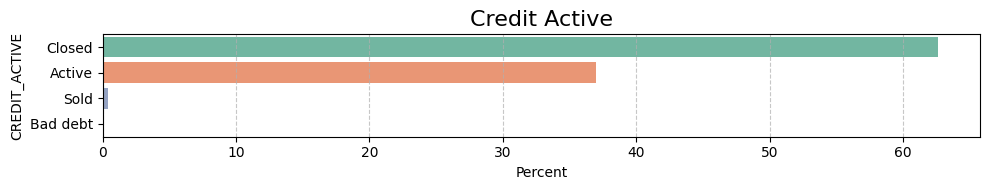

In [10]:
plot_object_col_percent(bureau, 'Credit Active', 'CREDIT_ACTIVE', figsize=(10, 2))

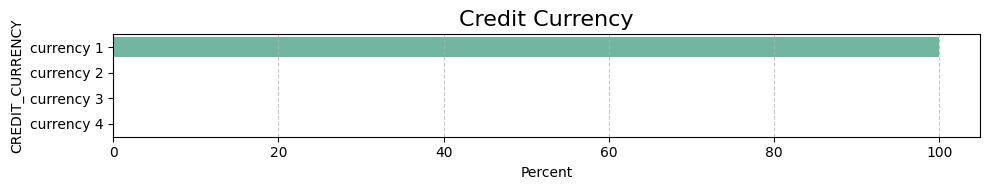

In [11]:
plot_object_col_percent(bureau, 'Credit Currency', 'CREDIT_CURRENCY', figsize=(10, 2), rotation=0)

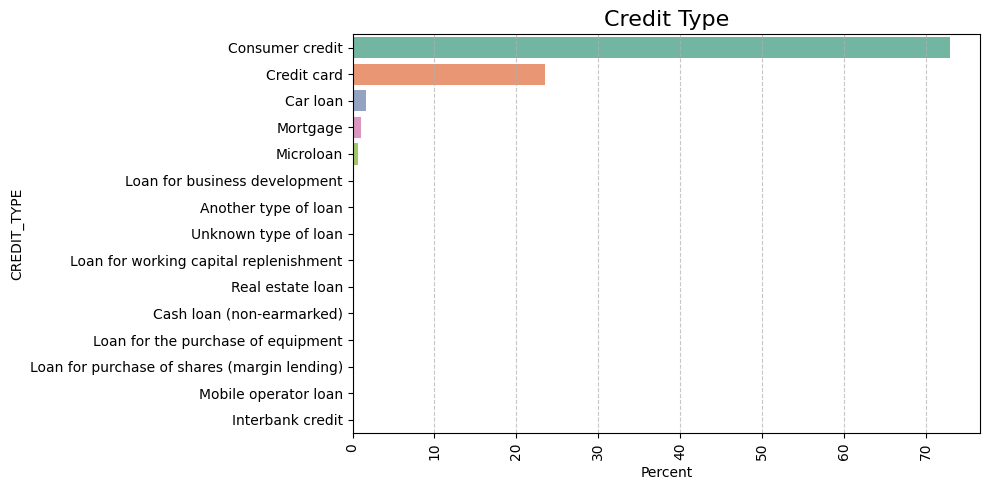

In [12]:
plot_object_col_percent(bureau, 'Credit Type', 'CREDIT_TYPE', figsize=(10, 5), rotation=90)

#### Comment:
- Most of the CREDIT_ACTIVE values are Closed (over 60%) and ACTIVE (about 35%), the rest are not much
- Almost all the value in CREDIT_CURRENCY is currency 1 -> Drop because it doesnt have much correlation with TARGET tbh
- The most popular type of credit is: Consumer Credit, Credit Card, Car loan and Mortgage, Microloan. For other value, I will grouped them into 1 categories name Others.

In [13]:
# describe numerical columns except SK_ID_CURR and SK_ID_BUREAU
with pd.option_context('display.float_format', '{:.1f}'.format):
    print(bureau.drop(['SK_ID_CURR', 'SK_ID_BUREAU'], axis=1).describe())

       DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
count    1465325.0           1465325.0            1376227.0   
mean       -1143.6                 0.9                493.1   
std          800.0                38.2               4964.9   
min        -2922.0                 0.0             -42060.0   
25%        -1671.0                 0.0              -1144.0   
50%         -985.0                 0.0               -334.0   
75%         -470.0                 0.0                473.0   
max            0.0              2792.0              31199.0   

       DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  \
count           920652.0                516780.0           1465325.0   
mean             -1022.8                  3942.9                 0.0   
std                718.4                219685.6                 0.1   
min             -42023.0                     0.0                 0.0   
25%              -1503.0                     0.0                 0.0   


#### Comment:
1. **DAYS_CREDIT**: Số ngày kể từ khi khách hàng mở khoản vay tại tổ chức tín dụng (giá trị âm cho biết số ngày trước hiện tại).
    - Muộn nhất đã có khoản vay từ 8 năm trước
   
2. **CREDIT_DAY_OVERDUE**: Số ngày quá hạn thanh toán của khoản vay. Nếu bằng 0, khoản vay chưa quá hạn.
    - Đa số khoản vay ko quá hạn, tuy nhiên có khoản vay quá hạn đến hơn 3 năm

3. **DAYS_CREDIT_ENDDATE**: The remaining duration of the Credit Bureau credit (in days) at the time of the current application - Số ngày còn lại cho đến khi khoản vay kết thúc (tại thời điểm đơn vay hiện tại).
    - Có khoản tín dụng hết hạn từ 115 năm, có khoản tín dụng còn hiệu lực đến 80 năm ? -> Những giá trị này khả năng là lỗi -> Chuyển thành NaN, chỉ giữ lại những khoản trong vòng 8 năm đổ lại vì cột DAYS_CREDIT có giá trị thấp nhất là 8 năm trước, mà ngày hết hạn tín dụng lại trước cả ngày tín dụng có hiệu lực thì điều đó là vô lý.

4. **DAYS_ENDDATE_FACT**: The number of days since the Credit Bureau credit ended at the time of the current application (only for closed credits). Số ngày kể từ khi khoản vay thực tế kết thúc (chỉ áp dụng cho khoản vay đã đóng).
    - Again, kết thúc trước thời hạn 115 năm.

5. **AMT_CREDIT_MAX_OVERDUE**: Số tiền quá hạn tối đa từng ghi nhận cho khoản vay.
    - Đa số không có nợ quá hạn, tuy nhiên số ít lại có số nợ quá hạn quá lớn 115,987,185 (hàng trăm triệu), có thể cân nhắc thêm người này với bureau_balance trong thời gian đó (nếu có thể), nếu không cân nhắc để flag cho những người này do con số này có thể ảnh hưởng đến kq (nếu số người đủ lớn), còn không cân nhắc drop

6. **CNT_CREDIT_PROLONG**: Số lần khoản vay được gia hạn thêm.
    - Nhiều nhất 9 lần, ko đáng kể

7. **AMT_CREDIT_SUM**: Tổng số tiền tín dụng hiện tại (tổng hạn mức vay).
    - Đa số là không lớn, tuy nhiên có giá trị lên đến 396,000,000 -> cân nhắc (nếu hạn mức quá cao mà còn nợ nhiều thì khả năng có vấn đề)

8. **AMT_CREDIT_SUM_DEBT**: Tổng số dư nợ còn lại của khách hàng (tổng số tiền chưa trả).
    - Khoảng 1/2 là không còn dư nợ, tuy nhiên có những trường hợp rất lớn lên đến 170,100,000 -> cân nhắc đánh flag những khoản này

9. **AMT_CREDIT_SUM_LIMIT**: Hạn mức tín dụng còn lại mà khách hàng có thể sử dụng.
    - Tồn tại giá trị âm? Có thể là chi tiêu vượt hạn mức hoặc dữ liệu có vấn đề
    - Tồn tại giá trị 0? Có thể là khoản vay không có tín dụng quay vòng (có thể vì nhiều khoản vay trong credit type khác nhau)

10. **AMT_CREDIT_SUM_OVERDUE**: Tổng số tiền đang quá hạn thanh toán.
    - Đa số là không có

11. **DAYS_CREDIT_UPDATE**: the last update date relative to the loan application date.
    - Có người cập nhật lần cuối cách đây 115 năm ??? Vô lý
    - Again, số dương có nghĩa dữ liệu tín dụng sẽ được cập nhật sau 1 năm ??? Điều nay khá vô lý

12. **AMT_ANNUITY**: Số tiền khách hàng phải trả hàng năm cho khoản vay (khoản trả góp hàng năm).
    - Null nhiều nên chưa comment, tuy nhiên có những người ko bị yêu cầu phải trả hàng năm thì điêu


#### Comment:
- Thay những giá trị DAY_CREDIT_ENDDATE, DAY_ENDDATE_FACT, DAY_CREDIT_UPDATE thành NaN với những giá trị quá 50 năm, những giá trị này không mang nhiều ý nghĩa trong việc đánh giá khả năng tín dụng của khách hàng trong thời gian gần đây

In [14]:
#pd.set_option('display.max_rows', 153)
bureau.loc[(bureau['DAYS_CREDIT'] > bureau['DAYS_CREDIT_ENDDATE'])]

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
54394,5233073,Active,currency 1,-841,0,-16322.0,NaN,0.00,0,0.0,264909.240,0.0,0.0,Credit card,-39,NaN,121076
64127,5007091,Active,currency 1,-388,0,-41847.0,NaN,0.00,0,225000.0,0.000,225000.0,0.0,Credit card,-241,NaN,32911
92623,5588651,Active,currency 1,-331,0,-16303.0,NaN,0.00,0,0.0,0.000,0.0,0.0,Credit card,-38,NaN,6165
99632,5603841,Active,currency 1,-2211,0,-16295.0,NaN,0.00,1,0.0,25436.385,0.0,0.0,Credit card,-12,NaN,10280
104754,5612278,Closed,currency 1,-2796,0,-41821.0,-672.0,0.00,0,0.0,0.000,0.0,0.0,Credit card,-672,NaN,48631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414842,5751553,Closed,currency 1,-2882,0,-41871.0,-475.0,0.00,0,0.0,0.000,0.0,0.0,Credit card,-475,NaN,293239
1418158,5755454,Active,currency 1,-2686,0,-41869.0,NaN,0.00,0,0.0,0.000,0.0,0.0,Credit card,-232,NaN,169403
1429339,5596368,Active,currency 1,-2697,0,-16295.0,NaN,0.00,0,0.0,171183.600,0.0,0.0,Credit card,-12,NaN,23460
1451455,6649929,Closed,currency 1,-2783,0,-41823.0,-674.0,0.00,0,0.0,0.000,0.0,0.0,Credit card,-674,NaN,14301


#### Comment:
- Có một vài trường gặp tình trạng này, thường thì các giá trị DAYS_CREDIT_ENDDATE là siêu lớn so với DAYS_CREDIT, có 4 trường hợp đặc biệt là khoản vay đã được thanh toán và đúng là giá trị DAYS_ENDDATE_FACT > DAYS_CREDIT tuy nhiên giá trị DAYS_CREDIT_ENDDATE có vẻ bị điền giá trị sai
- DROP các trường DAYS_CREDIT_ENDDATE < DAYS_CREDIT

### 2.2 Boxplot for numerical data

In [15]:
def print_percentiles(data, column_name, percentiles = None):
    print('-'*100)
    if not percentiles:
        percentiles = list(range(0,80,25)) + list(range(90,101,2))
    for i in percentiles:
        print(f'The {i}th percentile value of {column_name} is {np.percentile(data[column_name].dropna(), i)}')
    print("*"*100)

In [16]:
def plot_continuous_variables(data, column_name, plot_types=['CDF', 'distplot', 'violin', 'box'], log_scale=False):
    data_to_plot = data[[column_name, 'TARGET']].dropna()
    
    for ele in plot_types:
        plt.figure(figsize=(10, 5))
        
        if ele == 'CDF':
            percentile_values_0 = data_to_plot[data_to_plot['TARGET'] == 0][[column_name]].sort_values(by=column_name)
            percentile_values_1 = data_to_plot[data_to_plot['TARGET'] == 1][[column_name]].sort_values(by=column_name)
            percentile_values_0['Percentile'] = [ele / (len(percentile_values_0)-1) for ele in range(len(percentile_values_0))]
            percentile_values_1['Percentile'] = [ele / (len(percentile_values_1)-1) for ele in range(len(percentile_values_1))]
            
            plt.plot(percentile_values_0[column_name], percentile_values_0['Percentile'], color='red', label='Non-Defaulters')
            plt.plot(percentile_values_1[column_name], percentile_values_1['Percentile'], color='black', label='Defaulters')
            plt.xlabel(column_name, fontsize=14, fontweight='bold')
            plt.ylabel('Probability', fontsize=14, fontweight='bold')
            plt.title(f'CDF of {column_name}', fontsize=16, fontweight='bold')
            plt.legend(fontsize='medium')
            if log_scale:
                plt.xscale('log')
                plt.xlabel(f'{column_name} - (log-scale)', fontsize=14, fontweight='bold')
        
        if ele == 'distplot':
            sns.histplot(data_to_plot[column_name][data['TARGET'] == 0].dropna(), kde=True, label='Non-Defaulters', color='red', stat="density")
            sns.histplot(data_to_plot[column_name][data['TARGET'] == 1].dropna(), kde=True, label='Defaulters', color='black', stat="density")
            plt.xlabel(column_name, fontsize=14, fontweight='bold')
            plt.ylabel('Probability Density', fontsize=14, fontweight='bold')
            plt.legend(fontsize='medium')
            plt.title(f'Dist-Plot of {column_name}', fontsize=16, fontweight='bold')
            if log_scale:
                plt.xscale('log')
                plt.xlabel(f'{column_name} (log scale)', fontsize=14, fontweight='bold')

        if ele == 'violin':  
            sns.violinplot(x='TARGET', y=column_name, data=data_to_plot, palette='Set2')
            plt.title(f'Violin-Plot of {column_name}', fontsize=16, fontweight='bold')
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)', fontsize=14, fontweight='bold')

        if ele == 'box':  
            sns.boxplot(x='TARGET', y=column_name, data=data_to_plot, palette='Set2')
            plt.title(f'Box-Plot of {column_name}', fontsize=16, fontweight='bold')
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)', fontsize=14, fontweight='bold')

        sns.despine(left=True, bottom=True)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

----------------------------------------------------------------------------------------------------
The 0th percentile value of DAYS_CREDIT_UPDATE is -41947.0
The 2th percentile value of DAYS_CREDIT_UPDATE is -2415.0
The 4th percentile value of DAYS_CREDIT_UPDATE is -2213.0
The 6th percentile value of DAYS_CREDIT_UPDATE is -2000.0
The 8th percentile value of DAYS_CREDIT_UPDATE is -1764.0
The 10th percentile value of DAYS_CREDIT_UPDATE is -1580.0
The 25th percentile value of DAYS_CREDIT_UPDATE is -903.0
The 50th percentile value of DAYS_CREDIT_UPDATE is -406.0
The 75th percentile value of DAYS_CREDIT_UPDATE is -33.0
The 100th percentile value of DAYS_CREDIT_UPDATE is 372.0
****************************************************************************************************


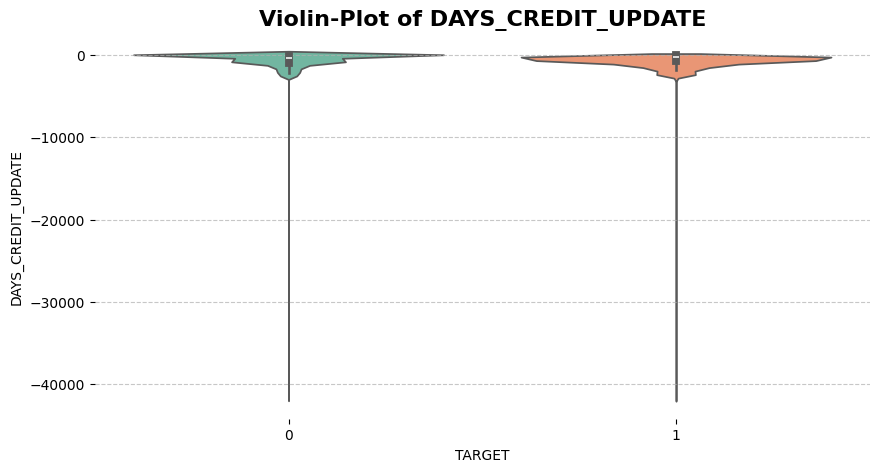

****************************************************************************************************


In [17]:
print_percentiles(bureau_merge, 'DAYS_CREDIT_UPDATE', percentiles = list(range(0,11,2)) + [25,50,75,100])
plot_continuous_variables(bureau_merge, 'DAYS_CREDIT_UPDATE', plot_types = ['violin'])
print('*'*100)

----------------------------------------------------------------------------------------------------
The 0th percentile value of DAYS_CREDIT_ENDDATE is -42060.0
The 2th percentile value of DAYS_CREDIT_ENDDATE is -2487.0
The 4th percentile value of DAYS_CREDIT_ENDDATE is -2334.0
The 6th percentile value of DAYS_CREDIT_ENDDATE is -2201.0
The 8th percentile value of DAYS_CREDIT_ENDDATE is -2072.0
The 10th percentile value of DAYS_CREDIT_ENDDATE is -1937.0
The 25th percentile value of DAYS_CREDIT_ENDDATE is -1142.0
The 50th percentile value of DAYS_CREDIT_ENDDATE is -333.0
The 75th percentile value of DAYS_CREDIT_ENDDATE is 473.0
The 100th percentile value of DAYS_CREDIT_ENDDATE is 31198.0
****************************************************************************************************


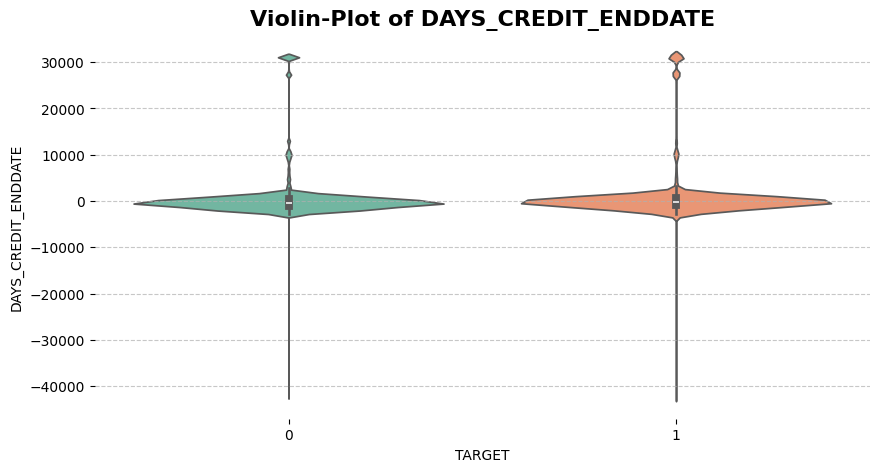

****************************************************************************************************


In [18]:
print_percentiles(bureau_merge, 'DAYS_CREDIT_ENDDATE', percentiles = list(range(0,11,2)) + [25,50,75,100])
plot_continuous_variables(bureau_merge, 'DAYS_CREDIT_ENDDATE', plot_types = ['violin'])
print('*'*100)

----------------------------------------------------------------------------------------------------
The 0th percentile value of DAYS_ENDDATE_FACT is -42023.0
The 2th percentile value of DAYS_ENDDATE_FACT is -2562.0
The 4th percentile value of DAYS_ENDDATE_FACT is -2450.0
The 6th percentile value of DAYS_ENDDATE_FACT is -2351.0
The 8th percentile value of DAYS_ENDDATE_FACT is -2265.0
The 10th percentile value of DAYS_ENDDATE_FACT is -2172.0
The 25th percentile value of DAYS_ENDDATE_FACT is -1502.0
The 50th percentile value of DAYS_ENDDATE_FACT is -898.0
The 75th percentile value of DAYS_ENDDATE_FACT is -427.0
The 100th percentile value of DAYS_ENDDATE_FACT is 0.0
****************************************************************************************************


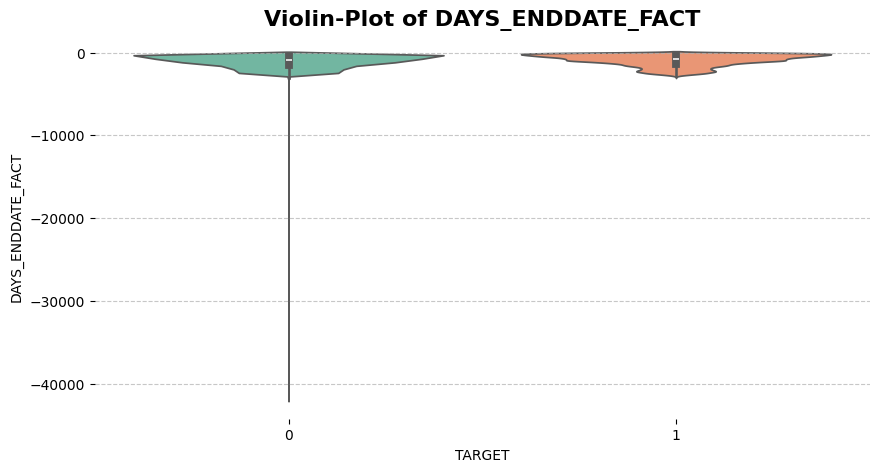

****************************************************************************************************


In [19]:
print_percentiles(bureau_merge, 'DAYS_ENDDATE_FACT', percentiles = list(range(0,11,2)) + [25,50,75,100])
plot_continuous_variables(bureau_merge, 'DAYS_ENDDATE_FACT', plot_types = ['violin'])
print('*'*100)

----------------------------------------------------------------------------------------------------
The 0th percentile value of CREDIT_DAY_OVERDUE is 0.0
The 2th percentile value of CREDIT_DAY_OVERDUE is 0.0
The 4th percentile value of CREDIT_DAY_OVERDUE is 0.0
The 6th percentile value of CREDIT_DAY_OVERDUE is 0.0
The 8th percentile value of CREDIT_DAY_OVERDUE is 0.0
The 10th percentile value of CREDIT_DAY_OVERDUE is 0.0
The 25th percentile value of CREDIT_DAY_OVERDUE is 0.0
The 50th percentile value of CREDIT_DAY_OVERDUE is 0.0
The 75th percentile value of CREDIT_DAY_OVERDUE is 0.0
The 100th percentile value of CREDIT_DAY_OVERDUE is 2792.0
****************************************************************************************************


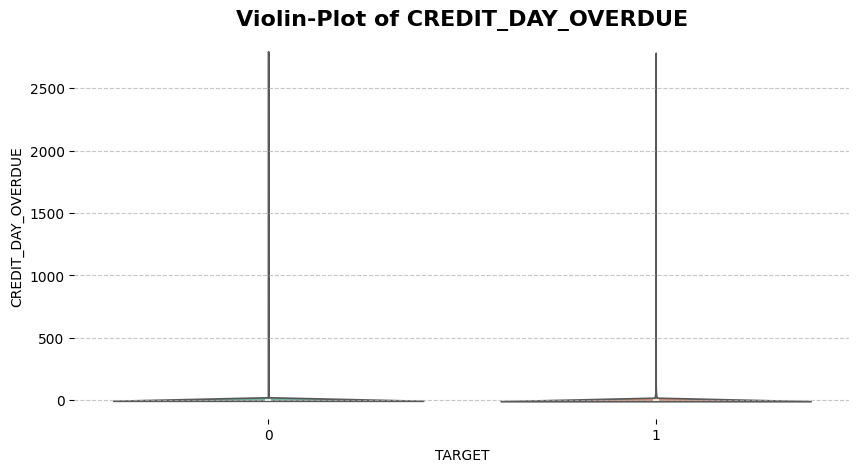

****************************************************************************************************


In [20]:
print_percentiles(bureau_merge, 'CREDIT_DAY_OVERDUE', percentiles = list(range(0,11,2)) + [25,50,75,100])
plot_continuous_variables(bureau_merge, 'CREDIT_DAY_OVERDUE', plot_types = ['violin'])
print('*'*100)

----------------------------------------------------------------------------------------------------
The 0th percentile value of AMT_CREDIT_MAX_OVERDUE is 0.0
The 2th percentile value of AMT_CREDIT_MAX_OVERDUE is 0.0
The 4th percentile value of AMT_CREDIT_MAX_OVERDUE is 0.0
The 6th percentile value of AMT_CREDIT_MAX_OVERDUE is 0.0
The 8th percentile value of AMT_CREDIT_MAX_OVERDUE is 0.0
The 10th percentile value of AMT_CREDIT_MAX_OVERDUE is 0.0
The 25th percentile value of AMT_CREDIT_MAX_OVERDUE is 0.0
The 50th percentile value of AMT_CREDIT_MAX_OVERDUE is 0.0
The 75th percentile value of AMT_CREDIT_MAX_OVERDUE is 0.0
The 100th percentile value of AMT_CREDIT_MAX_OVERDUE is 115987185.0
****************************************************************************************************


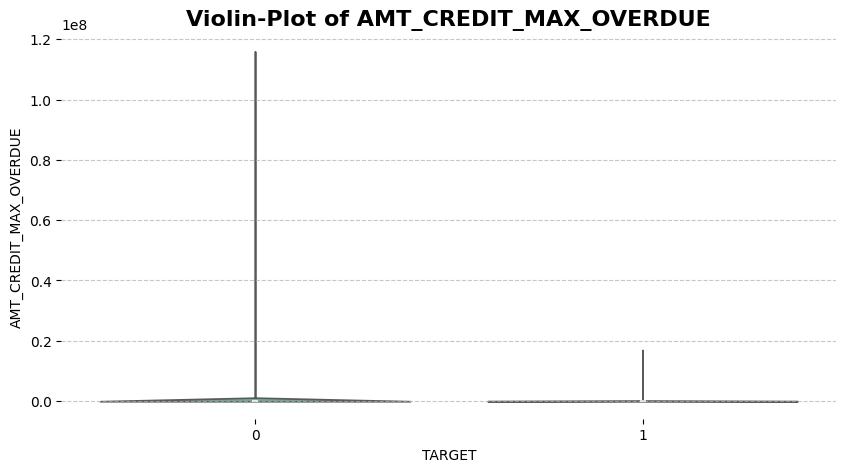

****************************************************************************************************


In [21]:
print_percentiles(bureau_merge, 'AMT_CREDIT_MAX_OVERDUE', percentiles = list(range(0,11,2)) + [25,50,75,100])
plot_continuous_variables(bureau_merge, 'AMT_CREDIT_MAX_OVERDUE', plot_types = ['violin'])
print('*'*100)

----------------------------------------------------------------------------------------------------
The 0th percentile value of AMT_CREDIT_SUM is 0.0
The 2th percentile value of AMT_CREDIT_SUM is 0.0
The 4th percentile value of AMT_CREDIT_SUM is 4500.0
The 6th percentile value of AMT_CREDIT_SUM is 14355.0
The 8th percentile value of AMT_CREDIT_SUM is 19485.0
The 10th percentile value of AMT_CREDIT_SUM is 22500.0
The 25th percentile value of AMT_CREDIT_SUM is 51174.0
The 50th percentile value of AMT_CREDIT_SUM is 124650.0
The 75th percentile value of AMT_CREDIT_SUM is 308106.0
The 100th percentile value of AMT_CREDIT_SUM is 170100000.0
****************************************************************************************************


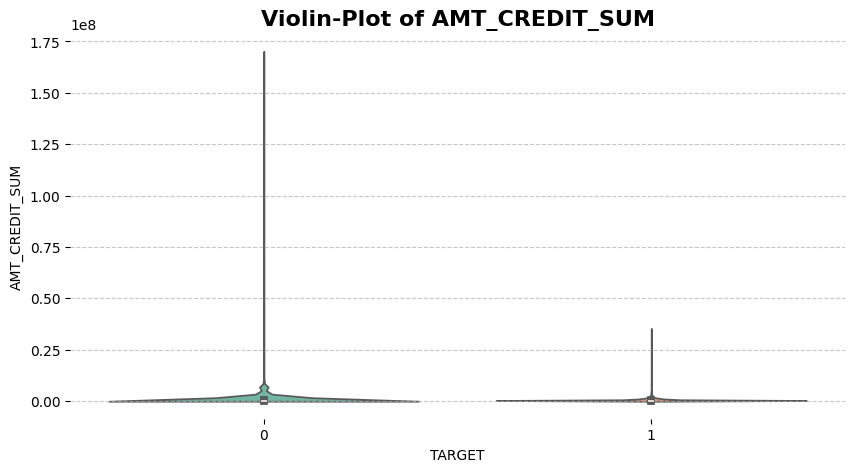

----------------------------------------------------------------------------------------------------


In [22]:
print_percentiles(bureau_merge, 'AMT_CREDIT_SUM', percentiles = list(range(0,11,2)) + [25,50,75,100])
plot_continuous_variables(bureau_merge, 'AMT_CREDIT_SUM', plot_types = ['violin'])
print('-'*100)

----------------------------------------------------------------------------------------------------
The 0th percentile value of AMT_CREDIT_SUM_DEBT is -4705600.32
The 2th percentile value of AMT_CREDIT_SUM_DEBT is 0.0
The 4th percentile value of AMT_CREDIT_SUM_DEBT is 0.0
The 6th percentile value of AMT_CREDIT_SUM_DEBT is 0.0
The 8th percentile value of AMT_CREDIT_SUM_DEBT is 0.0
The 10th percentile value of AMT_CREDIT_SUM_DEBT is 0.0
The 25th percentile value of AMT_CREDIT_SUM_DEBT is 0.0
The 50th percentile value of AMT_CREDIT_SUM_DEBT is 0.0
The 75th percentile value of AMT_CREDIT_SUM_DEBT is 39411.0
The 100th percentile value of AMT_CREDIT_SUM_DEBT is 170100000.0
****************************************************************************************************


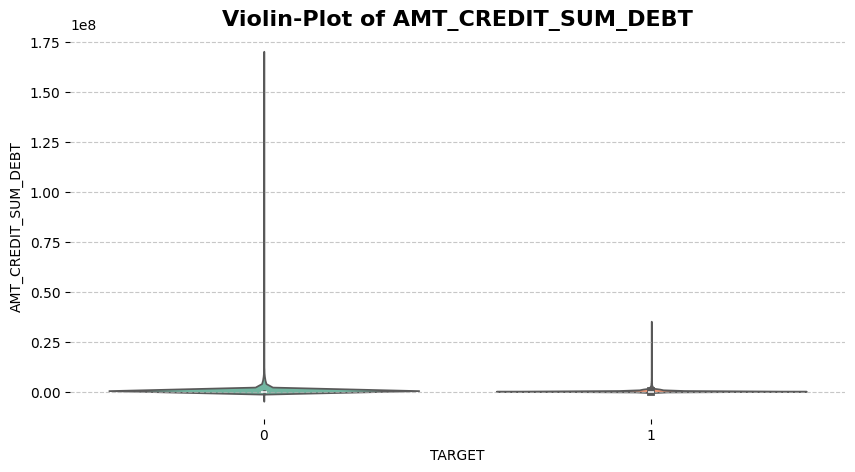

****************************************************************************************************


In [23]:
print_percentiles(bureau_merge, 'AMT_CREDIT_SUM_DEBT', percentiles = list(range(0,11,2)) + [25,50,75,100])
plot_continuous_variables(bureau_merge, 'AMT_CREDIT_SUM_DEBT', plot_types = ['violin'])
print('*'*100)

----------------------------------------------------------------------------------------------------
The 0th percentile value of AMT_CREDIT_SUM_LIMIT is -586406.115
The 2th percentile value of AMT_CREDIT_SUM_LIMIT is 0.0
The 4th percentile value of AMT_CREDIT_SUM_LIMIT is 0.0
The 6th percentile value of AMT_CREDIT_SUM_LIMIT is 0.0
The 8th percentile value of AMT_CREDIT_SUM_LIMIT is 0.0
The 10th percentile value of AMT_CREDIT_SUM_LIMIT is 0.0
The 25th percentile value of AMT_CREDIT_SUM_LIMIT is 0.0
The 50th percentile value of AMT_CREDIT_SUM_LIMIT is 0.0
The 75th percentile value of AMT_CREDIT_SUM_LIMIT is 0.0
The 100th percentile value of AMT_CREDIT_SUM_LIMIT is 4705600.32
****************************************************************************************************


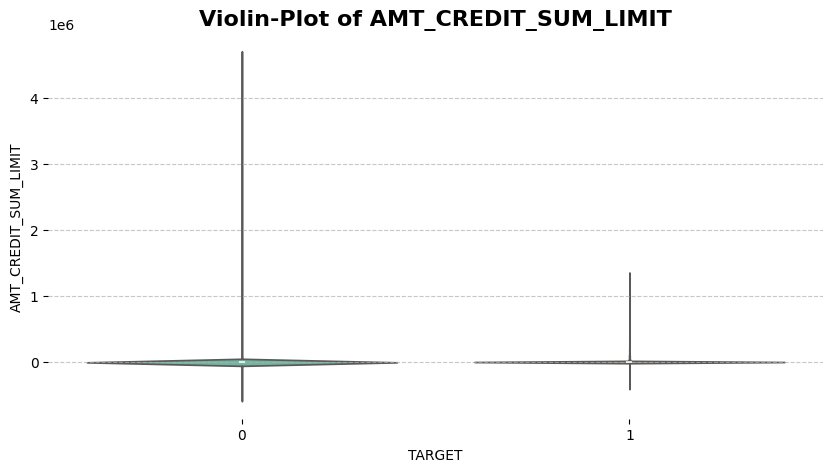

****************************************************************************************************


In [24]:
print_percentiles(bureau_merge, 'AMT_CREDIT_SUM_LIMIT', percentiles = list(range(0,11,2)) + [25,50,75,100])
plot_continuous_variables(bureau_merge, 'AMT_CREDIT_SUM_LIMIT', plot_types = ['violin'])
print('*'*100)

#### Comment:
- Nothing much to remark because the the larger value just indicates that these people may have a larger debt/ sum/ limit value
- Thing is, most value are centered around 0

## 3. Null Values

In [25]:
def nan_df_create(data):
    nan_percentages = data.isna().sum() * 100 / len(data)
    df = pd.DataFrame({'column' : nan_percentages.index, 'percent' : nan_percentages.values})

    #sorting the dataframe by decreasing order
    df = df.sort_values(by = 'percent', ascending = False)
    return df

In [26]:
def plot_nan(df_nan, title, figsize = (20,8), tight_layout = True, grid = False, rotation = 90):
    if df_nan[df_nan['percent'] != 0].shape[0] != 0:
        print(f'{df_nan[df_nan['percent'] != 0].shape[0]} columns have missing values')
        plt.figure(figsize = figsize, tight_layout = tight_layout)
        sns.barplot(x = 'column', y = 'percent', data = df_nan[df_nan['percent'] != 0])
        plt.title(f'Percentage of missing values in each column of {title}')
        plt.xlabel('Columns')
        plt.ylabel('Percentage of missing values')
        plt.xticks(rotation = rotation)
        plt.grid(grid)
        plt.show()
    else:
        print('No missing values in the dataframe')

In [27]:
def plot_nan(df_nan, title, figsize=(20, 8), tight_layout=True, grid=True, rotation=90):
    if df_nan[df_nan['percent'] != 0].shape[0] != 0:
        print(f"{df_nan[df_nan['percent'] != 0].shape[0]} columns have missing values")
        plt.figure(figsize=figsize, tight_layout=tight_layout)
        sns.barplot(x='column', y='percent', data=df_nan[df_nan['percent'] != 0], palette='tab10', edgecolor=None)
        plt.title(f'Percentage of missing values in each column of {title}', fontsize=16, fontweight='bold')
        plt.xlabel('Columns', fontsize=14, fontweight='bold')
        plt.ylabel('Percentage of missing values', fontsize=14, fontweight='bold')
        plt.xticks(rotation=rotation, fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(grid, axis='y', linestyle='--', alpha=0.7)  # Chỉ hiển thị lưới ngang
        sns.despine(left=True, bottom=True)

        # Thêm khung xung quanh biểu đồ
        plt.gca().spines['top'].set_visible(True)
        plt.gca().spines['right'].set_visible(True)
        plt.gca().spines['bottom'].set_visible(True)
        plt.gca().spines['left'].set_visible(True)

        plt.show()
    else:
        print('No missing values in the dataframe')


----------------------------------------------------------------------------------------------------
7 columns have missing values


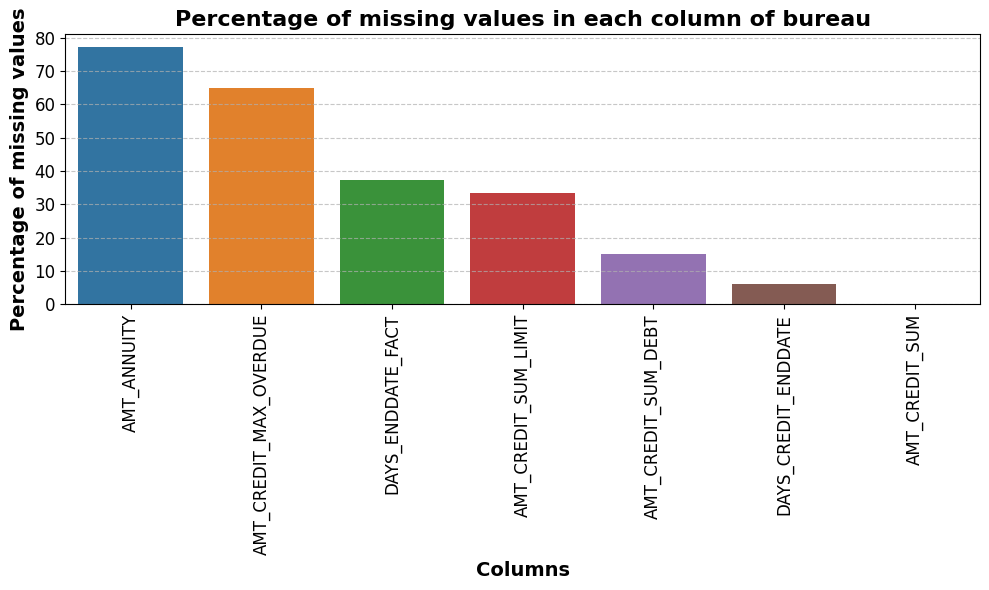

----------------------------------------------------------------------------------------------------


In [28]:
nan_df_bureau = nan_df_create(bureau)
print("-"*100)
plot_nan(nan_df_bureau, 'bureau', figsize=(10, 6))
print('-'*100)

### Comment:
- 7 columns has missing values with AMT_ANNUITY being the highest (nearly 80%) -> drop
- AMT_CREDIT_SUM has the lowest percent (nearly 0) - consider to drop these entries if the CREDIT_TYPE doesnt involve credit or CREDIT_ACTIVE is not Active

## 4. Potential problems/ outliers

### 4.1. End Date dưới âm phủ 


In [29]:
bureau.loc[(bureau['DAYS_CREDIT_ENDDATE'] < -8.06*365)]

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
54394,5233073,Active,currency 1,-841,0,-16322.0,NaN,0.00,0,0.0,264909.240,0.0,0.0,Credit card,-39,NaN,121076
64127,5007091,Active,currency 1,-388,0,-41847.0,NaN,0.00,0,225000.0,0.000,225000.0,0.0,Credit card,-241,NaN,32911
92623,5588651,Active,currency 1,-331,0,-16303.0,NaN,0.00,0,0.0,0.000,0.0,0.0,Credit card,-38,NaN,6165
99632,5603841,Active,currency 1,-2211,0,-16295.0,NaN,0.00,1,0.0,25436.385,0.0,0.0,Credit card,-12,NaN,10280
104754,5612278,Closed,currency 1,-2796,0,-41821.0,-672.0,0.00,0,0.0,0.000,0.0,0.0,Credit card,-672,NaN,48631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414842,5751553,Closed,currency 1,-2882,0,-41871.0,-475.0,0.00,0,0.0,0.000,0.0,0.0,Credit card,-475,NaN,293239
1418158,5755454,Active,currency 1,-2686,0,-41869.0,NaN,0.00,0,0.0,0.000,0.0,0.0,Credit card,-232,NaN,169403
1429339,5596368,Active,currency 1,-2697,0,-16295.0,NaN,0.00,0,0.0,171183.600,0.0,0.0,Credit card,-12,NaN,23460
1451455,6649929,Closed,currency 1,-2783,0,-41823.0,-674.0,0.00,0,0.0,0.000,0.0,0.0,Credit card,-674,NaN,14301


#### Comment:
- (chỉ lấy khoản nợ có DAYS_CREDIT_ENDDATE trong 8 năm đổ lại) do gía trị quá lớn dẫn đến bất hợp lý. Có thể drop vì chỉ hơn 100 giá trị

In [30]:
bureau.loc[(bureau['DAYS_CREDIT_ENDDATE'] > 50*365)]

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
5,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.0,71017.38,108982.62,0.0,Credit card,-31,NaN,254629
168,5714639,Closed,currency 1,-2030,0,31111.0,-1750.0,NaN,0,85050.0,0.00,0.00,0.0,Credit card,-555,NaN,80260
213,5714690,Active,currency 1,-137,0,27460.0,NaN,0.0,0,22500.0,18765.63,76.59,0.0,Credit card,-31,NaN,80377
283,5714776,Active,currency 1,-1144,0,31081.0,NaN,NaN,0,225000.0,0.00,0.00,0.0,Credit card,-41,NaN,154187
461,5714983,Active,currency 1,-64,0,27460.0,NaN,0.0,0,22500.0,0.00,22500.00,0.0,Credit card,-17,NaN,219903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465190,5582125,Active,currency 1,-339,0,27415.0,NaN,0.0,0,90000.0,89350.92,649.08,0.0,Credit card,-21,NaN,101518
1465218,5582222,Active,currency 1,-114,0,27415.0,NaN,NaN,0,90000.0,53644.50,NaN,0.0,Credit card,-21,NaN,259058
1465260,5582349,Active,currency 1,-573,0,27415.0,NaN,0.0,1,270000.0,243131.67,26868.33,0.0,Credit card,-21,NaN,104519
1465273,5095065,Closed,currency 1,-2779,0,31104.0,-1426.0,NaN,0,170010.0,0.00,NaN,0.0,Credit card,-1426,0.0,91029


#### Comment:
- Có rất nhiều khoản nợ vượt trên 8 năm, điều này không mang nhiều ý nghĩa đánh giá cho mô hình

In [31]:
bureau.loc[(bureau['DAYS_ENDDATE_FACT'] < -8.06*365)]

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
244316,6550986,Closed,currency 1,-2340,0,-1836.0,-42023.0,0.0,0,225000.0,0.0,225000.0,0.0,Credit card,-2196,NaN,211877
975805,6638194,Closed,currency 1,-1021,0,74.0,-3042.0,NaN,0,711450.0,0.0,0.0,0.0,Consumer credit,-16,0.0,238772


#### Comment:
- Có 2 khoản nợ được trả trước khi cả lúc nó được đăng ký -> Drop vì giá trị sai

In [32]:
bureau.loc[(bureau['DAYS_CREDIT_UPDATE'] < -8.05*365)]

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
2248,5716863,Closed,currency 1,-331,0,765.0,-208.0,0.0,0,16414.245,0.0,16414.245,0.0,Credit card,-41857,NaN,272028
23480,5200446,Closed,currency 1,-488,0,608.0,-457.0,0.0,0,72859.500,0.0,72859.500,0.0,Credit card,-41913,NaN,249347
29304,5800600,Active,currency 1,-281,0,815.0,NaN,0.0,0,225000.000,0.0,NaN,0.0,Credit card,-41906,NaN,289054
29377,5800677,Closed,currency 1,-364,0,732.0,-294.0,0.0,0,450000.000,0.0,450000.000,0.0,Credit card,-41886,NaN,253416
43525,5214311,Active,currency 1,-1226,0,-130.0,NaN,0.0,0,225000.000,0.0,NaN,0.0,Credit card,-41900,NaN,240347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377313,6336727,Active,currency 1,-256,0,840.0,NaN,0.0,0,450000.000,0.0,NaN,0.0,Credit card,-41878,NaN,35581
1395022,6664079,Closed,currency 1,-310,0,786.0,-279.0,0.0,0,30842.640,0.0,30842.640,0.0,Credit card,-41914,NaN,150969
1439763,5639191,Closed,currency 1,-259,0,837.0,-227.0,0.0,0,135000.000,0.0,135000.000,0.0,Credit card,-41853,NaN,272744
1451925,6650455,Closed,currency 1,-265,0,831.0,-234.0,0.0,0,262619.640,0.0,262619.640,0.0,Credit card,-41854,NaN,271213


#### Comment:
- Các khoản nợ có thông tin về thời gian lần cuối được update nhỏ hơn cả khi nó được đăng ký cũng drop vì nó vô lý

In [33]:
bureau.loc[(bureau['DAYS_CREDIT_UPDATE'] > 0)]

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
180812,6595671,Active,currency 1,-484,0,1342.0,NaN,NaN,0,2555946.0,2140128.00,0.0,0.0,Car loan,20,NaN,120414
333033,5056780,Active,currency 1,-679,0,1147.0,NaN,NaN,0,3063946.5,2243178.00,0.0,0.0,Car loan,20,NaN,14788
571840,5977667,Active,currency 1,-241,0,1554.0,NaN,NaN,0,3755313.0,1658169.00,0.0,0.0,Car loan,13,NaN,137548
577196,5102523,Active,currency 1,-484,0,2073.0,NaN,NaN,0,3089313.0,2834914.50,0.0,0.0,Car loan,13,NaN,105510
577459,5102823,Active,currency 1,-268,0,828.0,NaN,NaN,0,2619000.0,2185474.50,0.0,0.0,Car loan,13,NaN,99835
687429,5657607,Active,currency 1,-510,0,1316.0,NaN,NaN,0,3507300.0,2859399.00,0.0,0.0,Car loan,15,NaN,16562
1064610,5074184,Active,currency 1,-594,0,1232.0,NaN,NaN,0,1125000.0,884875.50,0.0,0.0,Car loan,22,NaN,163973
1140790,6204245,Active,currency 1,-249,0,1942.0,NaN,NaN,0,5213277.0,5013787.50,0.0,0.0,Car loan,19,85500.0,45739
1148625,6170836,Active,currency 1,-293,0,803.0,NaN,NaN,0,1546794.0,1212030.00,0.0,0.0,Car loan,23,NaN,197950
1157492,5774840,Active,currency 1,-419,0,1042.0,NaN,NaN,0,2206138.5,1767573.00,0.0,0.0,Car loan,23,NaN,297590


- DAYS_CREDIT_UPDATE dương có nghĩa là trong x ngày tới, dữ liệu sẽ được updated? Tất cả các khoản vay có giá trị dương đều chưa hết hạn, và ENDDATE_FACT, ta giữ lại những khoản này

### 4.2. Có ENDDATE_FACT < 0 nhưng CREDIT_ACTIVE = Active
- Vô lý vì khoản vay đã kết thúc từ trước nhưng vẫn đang tính hoạt động -> Chuyển CREDIT_ACTIVE sang Closed

In [34]:
bureau.loc[(bureau['DAYS_ENDDATE_FACT'] < 0) &
           (bureau['CREDIT_ACTIVE'] == 'Active')]

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
385,5714883,Active,currency 1,-1022,0,-901.0,-1022.0,0.0,0,32703.975,0.0,0.0,0.0,Consumer credit,-1022,NaN,111611
2166,5716773,Active,currency 1,-403,0,-188.0,-403.0,0.0,0,70487.190,0.0,0.0,0.0,Consumer credit,-403,NaN,266756
3797,5720807,Active,currency 1,-2575,0,-1472.0,-2411.0,0.0,0,0.000,0.0,0.0,0.0,Credit card,-627,NaN,65836
3812,5720815,Active,currency 1,-2464,0,-1350.0,-2398.0,0.0,0,90000.000,0.0,0.0,0.0,Credit card,-638,NaN,99097
5824,5722940,Active,currency 1,-716,0,-198.0,-716.0,0.0,0,194364.000,0.0,0.0,0.0,Consumer credit,-715,NaN,267735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457434,6657062,Active,currency 1,-2507,0,-1392.0,-2430.0,0.0,0,45000.000,0.0,0.0,0.0,Credit card,-651,NaN,837
1459740,5572943,Active,currency 1,-2915,0,-1800.0,-1286.0,0.0,0,180000.000,0.0,0.0,0.0,Credit card,-1182,NaN,257570
1461047,5578268,Active,currency 1,-2903,0,-2477.0,-2903.0,0.0,0,133978.050,0.0,0.0,0.0,Consumer credit,-2903,NaN,139483
1461361,5579088,Active,currency 1,-2530,0,-1415.0,-2457.0,0.0,0,45000.000,0.0,0.0,0.0,Credit card,-674,NaN,56766


## 5. Correlation with TARGET

In [35]:
def plot_phik_matrix(data, categorical_columns, figsize=(20, 20), mask_upper=True, tight_layout=True, 
                     linewidth=0.1, fontsize=10, cmap='coolwarm', show_target_top_corr=True, target_top_columns=10):
    
    data_for_phik = data[categorical_columns].astype('object')
    phik_matrix = data_for_phik.phik_matrix()

    print('*' * 100)

    # Tạo mask để ẩn nửa trên của heatmap nếu cần
    if mask_upper:
        mask_array = np.ones(phik_matrix.shape)
        mask_array = np.triu(mask_array)
    else:
        mask_array = np.zeros(phik_matrix.shape)


    plt.figure(figsize=figsize, tight_layout=tight_layout)
    sns.heatmap(phik_matrix, annot=False, mask=mask_array, linewidth=linewidth, cmap=cmap)
    plt.xticks(rotation=90, fontsize=fontsize)
    plt.yticks(rotation=0, fontsize=fontsize)
    plt.title("Phi-K Correlation Heatmap for Categorical Features")

   # Khung
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.5)
        spine.set_color('black')  # Chỉnh màu khung nếu cần

    plt.show()
    print("*" * 100)

    if show_target_top_corr:
        print("Categories with highest values of Phi-K Correlation value with Target Variable are:")
        phik_df = pd.DataFrame({'Column Name': phik_matrix.TARGET.index[1:], 'Phik-Correlation': phik_matrix.TARGET.values[1:]})
        phik_df = phik_df.sort_values(by='Phik-Correlation', ascending=False)
        display(phik_df.head(target_top_columns))
        print("*" * 100)


****************************************************************************************************


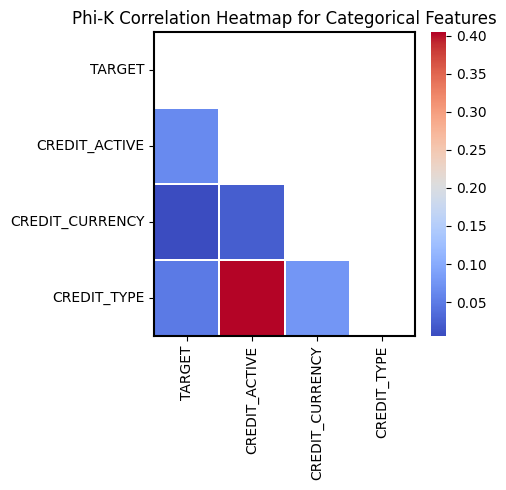

****************************************************************************************************
Categories with highest values of Phi-K Correlation value with Target Variable are:


,Column Name,Phik-Correlation
0,CREDIT_ACTIVE,0.064485
2,CREDIT_TYPE,0.048625
1,CREDIT_CURRENCY,0.005718


****************************************************************************************************


In [36]:
cols_for_phik = ['TARGET','CREDIT_ACTIVE','CREDIT_CURRENCY','CREDIT_TYPE']
plot_phik_matrix(bureau_merge, cols_for_phik,  figsize = (5,5))

### Comment
- No feature have linear correlation with TARGET feature

--------------------------------
# - EDA bureau_balance.csv

## 1. Shape and Description

In [37]:
print(f'Shape of bureau: {bureau.shape}')
print('*' * 50)
print(f'Unique SK_ID_BUREAU in bureau_balance: {bureau_balance['SK_ID_BUREAU'].nunique()}')
print(f"Max number of months for Months Balance: {np.abs(bureau_balance.MONTHS_BALANCE.min())}")
print('*'*50)
display(bureau.head())

Shape of bureau: (1465325, 17)
**************************************************
Unique SK_ID_BUREAU in bureau_balance: 817395
Max number of months for Months Balance: 96
**************************************************


,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,254629
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,254629
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,254629
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,254629


In [38]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [39]:
for col in bureau_balance.columns:
    if bureau_balance[col].dtype == 'object':
        print(f'Unique values in {col}: {bureau_balance[col].nunique()}')
        print(f'{bureau_balance[col].unique()}')

Unique values in STATUS: 8
['C' '0' 'X' '1' '2' '3' '5' '4']


#### Comment:
- C: closed
- X: no status
- 0: no DPD (Day Past Due)
- 1: 1-30 DPD
- 2: 30-60 DPD
- 3: 61-90 DPD
- 4: 91-120 DPD
- 5: 121+/ sold/ bad debt

- The status has been provided upto 8 years of history for loans of those exist

## 2. Null Value

In [40]:
plot_nan(nan_df_create(bureau_balance), 'bureau_balance')

No missing values in the dataframe


--------------------------------
# - Cleaning Data

In [55]:
bureau.loc[(bureau['DAYS_CREDIT_ENDDATE'].isna()) & (bureau['CREDIT_ACTIVE'] == 'Active')]

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629
21,5714486,Active,currency 1,-381,0,NaN,NaN,NaN,0,450000.0,520920.0,NaN,0.0,Consumer credit,-4,NaN,60900
24,5714489,Active,currency 1,-392,0,NaN,NaN,0.000,0,252000.0,23679.0,228320.100,0.0,Credit card,-22,NaN,60900
51,5714518,Active,currency 1,-1483,0,NaN,NaN,NaN,0,200250.0,0.0,NaN,0.0,Credit card,-848,NaN,122422
88,5714554,Active,currency 1,-581,0,NaN,NaN,0.000,0,384750.0,263056.5,121690.170,0.0,Credit card,-22,NaN,169756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465241,5582260,Active,currency 1,-892,0,NaN,NaN,NaN,0,49500.0,0.0,0.000,0.0,Credit card,-882,NaN,226735
1465247,5582268,Active,currency 1,-967,0,NaN,NaN,0.000,0,0.0,0.0,0.000,0.0,Credit card,-24,NaN,187253
1465271,5088379,Active,currency 1,-602,0,NaN,NaN,0.000,0,45000.0,39424.5,5574.825,0.0,Credit card,-22,4500.0,291862
1465282,5095737,Active,currency 1,-175,0,NaN,NaN,0.000,0,49500.0,42003.0,7494.255,0.0,Credit card,-18,NaN,80556


## 1.1 bureau_balance.csv
1. No need to clean

## 1.2 bureau.csv
1. Remove error value with NaN (DAY_CREDIT_ENDDATE, DAY_ENDDATE_FACT)
2. Change the CREDIT_ACTIVE to Closed for DAYS_ENDDATE_FACT < 0
3. Remove 'Currency', 'AMT_ANNUITY' column
5. Remove entries that have AMT_CREDIT_SUM = 0

In [41]:
def cleaning_bureau(data):
    # Drop all the unbelievable values
    data = data.loc[(data['DAYS_CREDIT_UPDATE'] >= -2922)]
    data = data.loc[(data['DAYS_ENDDATE_FACT'] >= -2922) |
                    (data['DAYS_ENDDATE_FACT'].isna())]
    data = data.loc[(data['DAYS_CREDIT_ENDDATE'] >= -2922)]

    # For loans that due in more than 50 years, we replace it with NaN
    data.loc[(data['DAYS_CREDIT_ENDDATE'] > 50*365)] = np.nan

    # Change CREDIT_ACTIVE to Closed for DAYS_ENDDATE_FACT < 0
    data.loc[(data['DAYS_ENDDATE_FACT'] < 0) & 
             (data['CREDIT_ACTIVE'] == 'Active'), 'CREDIT_ACTIVE'] = 'Closed'
    
    # Drop column with high missing values and not useful
    data = data.drop(['AMT_ANNUITY', 'CREDIT_CURRENCY'], axis=1)
    
    # Drop entries with AMT_CREDIT_SUM = 0
    data = data.loc[data['AMT_CREDIT_SUM'] != 0]
    
    return data

In [42]:
bureau_cleaned = cleaning_bureau(bureau)

In [43]:
bureau_cleaned.shape

(1332902, 15)

-----------------------
# - Feature Engineering

## 1. bureau_balance.csv

<Axes: xlabel='MONTHS_BALANCE'>

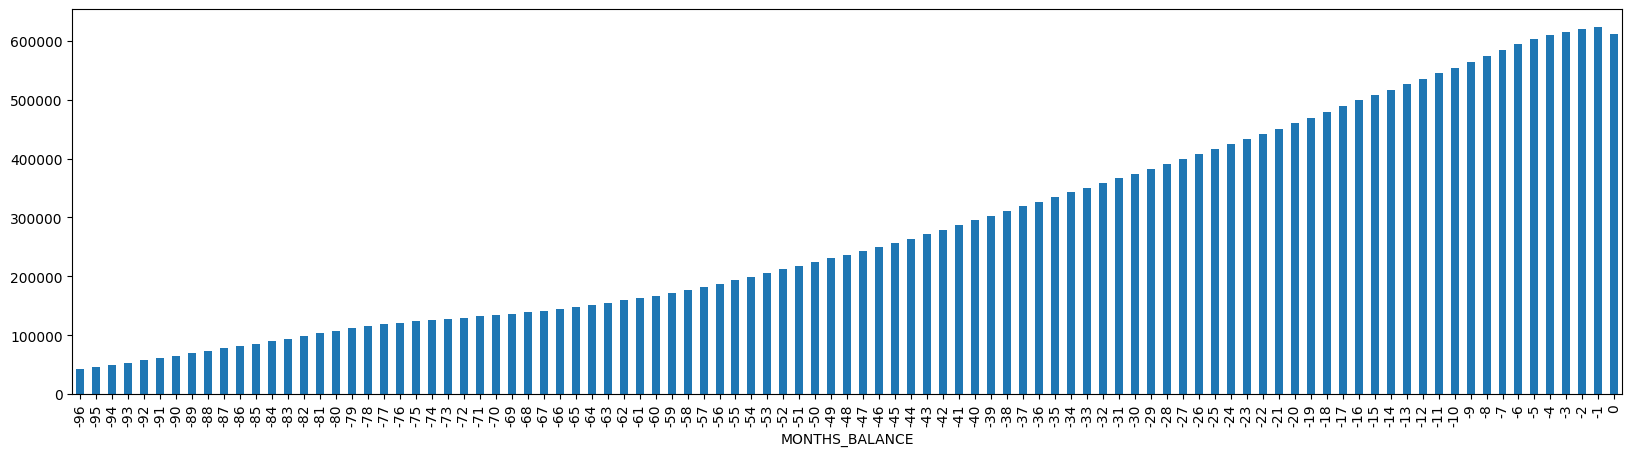

In [44]:
bureau_balance['MONTHS_BALANCE'].value_counts().sort_index().plot(kind='bar', figsize=(20, 5))

Because this file contains no NaN value and also contains important information for each SK_ID_BUREAU, i will create new feature set in this table first, then merge it with bureau table. Lastly, i will create new feature in merged_bureau table as for now, we have all the necessary history data of a pass loan.

This is time-series data, so we will need to numericalize the status and then use some simple time series method to see the pass credit trend. Because I want to focus more on the credit history in the past 3 years.

To see whether a customer is a default or not, we need to look at the weighted average throughout their credit history, the higher it is, the more likely they are unable to pay back the loan. X = unknown, therefore has a value of 4 (in the middle) to maintain the neutral.

We use the exponential weight moving average to create a smoothing feature that can smooth out the noise while still giving more importance on recent trends. Also, it is more responsive to change.

Because we focus more on the first 3 years, their behaviours will be aggregated for each year to find down any unexpected bahaviour through the moving average. The rest will be grouped into only 1 feature.

In [45]:
def feature_engineering_bureau_balance(bureau_balance):
    # Change the negative value to positive
    bureau_balance['MONTHS_BALANCE'] = np.abs(bureau_balance['MONTHS_BALANCE'])
    
    status_dict = {'C': 0, '0': 1, '1': 2, '2': 3, 'X': 4, '3': 5, '4': 6, '5': 7}
    bureau_balance['STATUS'] = bureau_balance['STATUS'].map(status_dict)

    bureau_balance['WEIGHTED_STATUS'] = bureau_balance['STATUS'] / (bureau_balance['MONTHS_BALANCE'] + 1) # Avoid division by zero
    bureau_balance = bureau_balance.sort_values(
        by=['SK_ID_BUREAU', 'MONTHS_BALANCE'], ascending=[True, True]
        ) # Sorting to calculate moving averages

    bureau_balance['MONTHS_BALANCE'] = bureau_balance['MONTHS_BALANCE'] // 12

    # Using exponential weighted moving average to calculate the weighted status
    bureau_balance['EXP_WEIGHTED_STATUS'] = bureau_balance.groupby('SK_ID_BUREAU')['WEIGHTED_STATUS'] \
                                                        .transform(lambda x: x.ewm(alpha = 0.7).mean())
    
    # Using exponential moving average to calculate the status
    bureau_balance['EXP_ENCODED_STATUS'] = bureau_balance.groupby('SK_ID_BUREAU')['STATUS'] \
                                                        .transform(lambda x: x.ewm(alpha = 0.7).mean())
    

    # Aggregating data for each SK_ID_BUREAU
    bureau_balance_agg = bureau_balance.groupby(['SK_ID_BUREAU']).agg({
        'MONTHS_BALANCE' : ['mean','max'],
        'STATUS' : ['mean','max','first'],
        'WEIGHTED_STATUS' : ['mean','sum','first'],
        'EXP_WEIGHTED_STATUS' : ['last'],
        'EXP_ENCODED_STATUS' : ['last']
        })
    bureau_balance_agg.columns = ['_'.join(ele).upper() for ele in bureau_balance_agg.columns]

    # Aggregating data for the last 3 years
    balance_agg_all_years = pd.DataFrame()
    for period in range(3):
        period_group = bureau_balance.loc[bureau_balance['MONTHS_BALANCE'] == period].groupby('SK_ID_BUREAU').agg({
            'STATUS': ['mean', 'max', 'last', 'first'],
            'WEIGHTED_STATUS': ['mean', 'max', 'first', 'last'],
            'EXP_WEIGHTED_STATUS': ['last'],
            'EXP_ENCODED_STATUS': ['last']
        })
        
        period_group.columns = ['_'.join(col).upper() + '_PERIOD_' + str(period) for col in period_group.columns]

        if period == 0:
            balance_agg_all_years = period_group
        else:
            balance_agg_all_years = balance_agg_all_years.merge(period_group, on='SK_ID_BUREAU', how='outer')


    balance_agg_rest_years = bureau_balance[bureau_balance.MONTHS_BALANCE > period] \
                    .groupby(['SK_ID_BUREAU']).agg({
                                                'STATUS' : ['mean','max','last','first'],
                                                'WEIGHTED_STATUS' : ['mean','max', 'first','last'],
                                                'EXP_WEIGHTED_STATUS' : ['last'],
                                                'EXP_ENCODED_STATUS' : ['last'] 
                                                })
    balance_agg_rest_years.columns = ['_'.join(ele).upper() + '_THE_REST' for ele in balance_agg_rest_years.columns]

    balance_agg_all_years = balance_agg_all_years.merge(balance_agg_rest_years, on = 'SK_ID_BUREAU', how = 'outer')
    bureau_balance_agg = bureau_balance_agg.merge(balance_agg_all_years, on = 'SK_ID_BUREAU', how = 'inner')

    bureau_balance_agg.fillna(0, inplace = True)
    
    return bureau_balance_agg

In [46]:
bureau_balance = pd.read_csv('..//..//dataset//bureau_balance.csv')

In [47]:
bureau_balance_final = feature_engineering_bureau_balance(bureau_balance)

In [48]:
bureau_balance_final

,MONTHS_BALANCE_MEAN,MONTHS_BALANCE_MAX,STATUS_MEAN,STATUS_MAX,STATUS_FIRST,WEIGHTED_STATUS_MEAN,WEIGHTED_STATUS_SUM,WEIGHTED_STATUS_FIRST,EXP_WEIGHTED_STATUS_LAST,EXP_ENCODED_STATUS_LAST,STATUS_MEAN_PERIOD_0,STATUS_MAX_PERIOD_0,STATUS_LAST_PERIOD_0,STATUS_FIRST_PERIOD_0,WEIGHTED_STATUS_MEAN_PERIOD_0,WEIGHTED_STATUS_MAX_PERIOD_0,WEIGHTED_STATUS_FIRST_PERIOD_0,WEIGHTED_STATUS_LAST_PERIOD_0,EXP_WEIGHTED_STATUS_LAST_PERIOD_0,EXP_ENCODED_STATUS_LAST_PERIOD_0,STATUS_MEAN_PERIOD_1,STATUS_MAX_PERIOD_1,STATUS_LAST_PERIOD_1,STATUS_FIRST_PERIOD_1,WEIGHTED_STATUS_MEAN_PERIOD_1,WEIGHTED_STATUS_MAX_PERIOD_1,WEIGHTED_STATUS_FIRST_PERIOD_1,WEIGHTED_STATUS_LAST_PERIOD_1,EXP_WEIGHTED_STATUS_LAST_PERIOD_1,EXP_ENCODED_STATUS_LAST_PERIOD_1,STATUS_MEAN_PERIOD_2,STATUS_MAX_PERIOD_2,STATUS_LAST_PERIOD_2,STATUS_FIRST_PERIOD_2,WEIGHTED_STATUS_MEAN_PERIOD_2,WEIGHTED_STATUS_MAX_PERIOD_2,WEIGHTED_STATUS_FIRST_PERIOD_2,WEIGHTED_STATUS_LAST_PERIOD_2,EXP_WEIGHTED_STATUS_LAST_PERIOD_2,EXP_ENCODED_STATUS_LAST_PERIOD_2,STATUS_MEAN_THE_REST,STATUS_MAX_THE_REST,STATUS_LAST_THE_REST,STATUS_FIRST_THE_REST,WEIGHTED_STATUS_MEAN_THE_REST,WEIGHTED_STATUS_MAX_THE_REST,WEIGHTED_STATUS_FIRST_THE_REST,WEIGHTED_STATUS_LAST_THE_REST,EXP_WEIGHTED_STATUS_LAST_THE_REST,EXP_ENCODED_STATUS_LAST_THE_REST
SK_ID_BUREAU,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5001709,3.546392,8,0.453608,4,0,0.004936,0.478827,0.0,0.041423,3.999993,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.721311,4.0,4.0,0.0,0.007850,0.045977,0.000000,0.041237,0.041423,3.999993
5001710,2.963855,6,1.506024,4,0,0.022689,1.883185,0.0,0.048447,4.000000,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,2.659574,4.0,4.0,0.0,0.040068,0.080000,0.000000,0.048193,0.048447,4.000000
5001711,0.000000,0,1.750000,4,4,1.270833,5.083333,4.0,0.354975,1.057163,1.75,4.0,1.0,4.0,1.270833,4.0,4.0,0.250000,0.354975,1.057163,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5001712,0.368421,1,0.526316,1,0,0.037830,0.718771,0.0,0.053953,0.999994,0.25,1.0,1.0,0.0,0.022854,0.1,0.0,0.083333,0.083724,0.973001,1.000000,1.0,1.0,1.0,0.063504,0.076923,0.076923,0.052632,0.053953,0.999994,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5001713,0.454545,1,4.000000,4,4,0.671057,14.763253,4.0,0.185700,4.000000,4.00,4.0,4.0,4.0,1.034404,4.0,4.0,0.333333,0.347644,4.000000,4.000000,4.0,4.0,4.0,0.235041,0.307692,0.307692,0.181818,0.185700,4.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6842884,1.500000,3,1.770833,4,0,0.058626,2.814045,0.0,0.064777,3.100018,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.333333,4.0,4.0,0.0,0.059406,0.190476,0.000000,0.166667,0.168243,3.967600,4.000000,4.0,4.0,4.0,0.132867,0.160000,0.16,0.111111,0.112507,4.000000,1.750000,4.0,4.0,4.0,0.042231,0.108108,0.108108,0.083333,0.064777,3.100018
6842885,0.500000,1,4.000000,7,7,0.933134,22.395222,7.0,0.042476,1.000003,7.00,7.0,7.0,7.0,1.810206,7.0,7.0,0.583333,0.608378,7.000000,1.000000,1.0,1.0,1.0,0.056062,0.076923,0.076923,0.041667,0.042476,1.000003,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000

## 2. bureau.csv

In [49]:
bureau_cleaned.columns

Index(['SK_ID_BUREAU', 'CREDIT_ACTIVE', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE',
       'DAYS_CREDIT_UPDATE', 'SK_ID_CURR'],
      dtype='object')

1. Merge with bureau_balance
2. For CREDIT_TYPE, we bin all columns other than Consumer Credit, credit card, car loan, mortgage, microloan
3. For CREDIT_ACTIVE, we bin Sold and Bad Debt into one feature
4. For DAYS/ AMT columns: Create features based on domain knowledge

In [50]:
def feature_engineering_bureau(bureau, final_bureau_balance):
    # Merge the bureau_balance with bureau
    bureau = bureau.merge(final_bureau_balance, on='SK_ID_BUREAU', how='left')

    # New features for DAYS columns:
    bureau['CREDIT_AGE'] = abs(bureau['DAYS_CREDIT'])
    bureau['CREDIT_DURATION'] = abs(bureau['DAYS_CREDIT'] - bureau['DAYS_CREDIT_ENDDATE'])
    bureau['DAYS_CREDIT_LEFT'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_CREDIT']
    bureau['FLAG_IS_OVERDUE'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x > 0 else 0)
    bureau['DAYS_OVERDUE_DURATION'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: max(0,x))
    bureau['DAYS_OVERDUE_RATIO'] = bureau['CREDIT_DAY_OVERDUE'] / (bureau['CREDIT_DURATION'] + 0.0001)
    bureau['DAYS_EARLY_REPAYMENT'] = abs(bureau['DAYS_ENDDATE_FACT'] - bureau['DAYS_CREDIT_ENDDATE'])
    bureau['FLAG_IS_EARLY_REPAYMENT'] = bureau['DAYS_CREDIT_ENDDATE'].apply(lambda x: 1 if x > 0 else 0)
    bureau['DAYS_SINCE_LAST_UPDATE'] = bureau['DAYS_CREDIT_UPDATE'] - bureau['DAYS_CREDIT']
    bureau['CREDIT_ENDDATE_UPDATE_DIFF'] = abs(bureau['DAYS_CREDIT_UPDATE'] - bureau['DAYS_CREDIT_ENDDATE']) 
    
    # New features for AMT columns:
    bureau['CREDIT_UTILIZATION_RATIO'] = bureau['AMT_CREDIT_SUM_DEBT'] / (bureau['AMT_CREDIT_SUM'] + 0.0001)
    bureau['AMT_OVERDUE_RATIO'] = bureau['AMT_CREDIT_SUM_OVERDUE'] / (bureau['AMT_CREDIT_SUM'] + 0.0001)
    bureau['PROLONGATION_FREQUENCY'] = bureau['CNT_CREDIT_PROLONG'] / (bureau['CREDIT_DURATION'] + 0.0001)
    bureau['CREDIT_DEBT_DIFF'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_DEBT']
    bureau['DEBT_LIMIT_RATIO'] = bureau['AMT_CREDIT_SUM_DEBT'] / (bureau['AMT_CREDIT_SUM_LIMIT'] + 0.0001)
    bureau['MAX_OVERDUE_DEBT_RATIO'] = bureau['AMT_CREDIT_MAX_OVERDUE'] / (bureau['AMT_CREDIT_SUM_DEBT'] + 0.0001)
    bureau['TOTAL_RISK_SCORE'] = bureau['CREDIT_UTILIZATION_RATIO'] + bureau['AMT_OVERDUE_RATIO'] + bureau['DEBT_LIMIT_RATIO']
    bureau['DEBT_CREDIT_RATIO'] = bureau['AMT_CREDIT_SUM_DEBT'] / (bureau['AMT_CREDIT_SUM_OVERDUE'] + 0.0001)
    bureau['OVERDUE_SEVERITY'] = bureau['AMT_CREDIT_MAX_OVERDUE'] / (bureau['AMT_CREDIT_SUM_OVERDUE'] + 0.0001)
    bureau['OVERDUE_DURATION_RATIO'] = bureau['DAYS_OVERDUE_DURATION'] / (bureau['CREDIT_DURATION'] + 0.0001)
    bureau['OVERDUE_SEVERITY_RATIO'] = bureau['OVERDUE_SEVERITY'] / (bureau['DAYS_OVERDUE_DURATION'] + 0.0001)
    bureau['RISK_EXPOSURE_RATIO'] = (bureau['AMT_CREDIT_SUM_DEBT'] + bureau['AMT_CREDIT_SUM_OVERDUE']) / (bureau['AMT_CREDIT_SUM_LIMIT'] + 0.0001)

    # Combine all other credit type into 'Other' category (expect Consumer Credit, credit card, car loan, mortgage, microloan)
    column_to_keep = ['Consumer credit', 'Credit card', 'Car loan', 'Mortgage', 'Microloan']
    bureau['CREDIT_TYPE'] = bureau['CREDIT_TYPE'].apply(lambda x: x if x in column_to_keep else 'Other')

    # Only keep Active and Closed status, change Sold and Bad Debt to Other
    column_to_keep = ['Active', 'Closed']
    bureau['CREDIT_ACTIVE'] = bureau['CREDIT_ACTIVE'].apply(lambda x: x if x in column_to_keep else 'Other')

    # Aggregate with respect to 'SK_ID_CURR' in order to merge with application_train
    # First, aggreagate based on the category of CREDIT_ACTIVE
    aggregate_CREDIT_ACTIVE = {
        'CREDIT_AGE' : ['mean', 'max', 'min'],
        'CREDIT_DURATION' : ['mean', 'max', 'min'],
        'DAYS_CREDIT_LEFT' : ['mean', 'max', 'min'],
        'FLAG_IS_OVERDUE' : ['sum'],
        'DAYS_OVERDUE_DURATION' : ['mean', 'max', 'min'],
        'DAYS_OVERDUE_RATIO' : ['mean', 'max', 'min'],
        'DAYS_EARLY_REPAYMENT' : ['mean', 'max'],
        'FLAG_IS_EARLY_REPAYMENT' : ['sum'],
        'DAYS_SINCE_LAST_UPDATE' : ['mean', 'max', 'min'],
        'CREDIT_ENDDATE_UPDATE_DIFF' : ['mean', 'max', 'min'],
        'CREDIT_UTILIZATION_RATIO' : ['mean', 'max', 'min'],
        'AMT_OVERDUE_RATIO' : ['mean', 'max', 'min'],
        'PROLONGATION_FREQUENCY' : ['mean', 'max', 'min'],
        'CREDIT_DEBT_DIFF' : ['mean', 'max', 'min'],
        'DEBT_LIMIT_RATIO' : ['mean', 'max', 'min'],
        'MAX_OVERDUE_DEBT_RATIO' : ['mean', 'max', 'min'],
        'TOTAL_RISK_SCORE' : ['mean', 'max', 'min'],
        'DEBT_CREDIT_RATIO' : ['mean', 'max', 'min'],
        'OVERDUE_SEVERITY' : ['mean', 'max', 'min'],
        'OVERDUE_DURATION_RATIO' : ['mean', 'max', 'min'],
        'OVERDUE_SEVERITY_RATIO' : ['mean', 'max', 'min'],
        'RISK_EXPOSURE_RATIO' : ['mean', 'max', 'min'],
        'DAYS_CREDIT' : ['mean','min','max','last'],
        'CREDIT_DAY_OVERDUE' : ['mean','max'],
        'DAYS_CREDIT_ENDDATE' : ['mean','max'],
        'DAYS_ENDDATE_FACT' : ['mean','min'],
        'AMT_CREDIT_MAX_OVERDUE': ['max','sum'],
        'CNT_CREDIT_PROLONG': ['max','sum'],
        'AMT_CREDIT_SUM' : ['sum','max'],
        'AMT_CREDIT_SUM_DEBT': ['sum'],
        'AMT_CREDIT_SUM_LIMIT': ['max','sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['max','sum'],
        'DAYS_CREDIT_UPDATE' : ['mean','min'],
    }

    agg_bureau_credit = pd.DataFrame()
    agg_active_type = ['Active', 'Closed', 'Other']
    for i, type in enumerate(agg_active_type):
        bureau_type = bureau.loc[bureau['CREDIT_ACTIVE'] == type]
        bureau_type_agg = bureau_type.groupby('SK_ID_CURR').agg(aggregate_CREDIT_ACTIVE)
        bureau_type_agg.columns = pd.Index(['_'.join(col_name).upper() + '_CREDIT_ACTIVE_' + type.upper() 
                                            for col_name in bureau_type_agg.columns.tolist()])
        
        if i == 0:
            agg_bureau_credit = bureau_type_agg
        else:
            agg_bureau_credit = agg_bureau_credit.merge(bureau_type_agg, on='SK_ID_CURR', how='outer')

    # One-hot encoding for CREDIT_ACTIVE, CREDIT_TYPE
    credit_active_dummies = pd.get_dummies(bureau['CREDIT_ACTIVE'], prefix='CREDIT_ACTIVE')
    credit_type_dummies = pd.get_dummies(bureau['CREDIT_TYPE'], prefix='CREDIT_TYPE')
    bureau = pd.concat([bureau, credit_active_dummies, credit_type_dummies], axis=1)
    bureau = bureau.drop(['CREDIT_ACTIVE', 'CREDIT_TYPE'], axis=1)

    # Finally, aggregate based on 'SK_ID_CURR'
    bureau_agg = bureau.drop('SK_ID_BUREAU', axis = 1).groupby('SK_ID_CURR').agg('mean')
    bureau_agg.columns = [col + '_MEAN_OVERALL' for col in bureau_agg.columns]
    bureau_agg = bureau_agg.merge(agg_bureau_credit, on='SK_ID_CURR', how='outer')

    return bureau_agg

In [51]:
bureau_final = feature_engineering_bureau(bureau_cleaned, bureau_balance_final)

In [52]:
bureau_final.shape

(258842, 344)

#### ME, AT 1AM, IN THE FUTURE: This is the initial version of feature engineering when i throw bunches of thing in and hope it would do something then realize i can't run the model without running out of ram (and we did, indeed, run out of ram when training). So in the model, we remove some of the features (but still it doesnt matter much anw, the model still fail to do anything meaningful than failing itself)